<a href="https://colab.research.google.com/github/rog-SARTHAK/TensorFlow/blob/main/Tensorflow_Celcius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
cels = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fah = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

for index, c in enumerate(cels):
  print("{} degree Celcius equals {} degree Fahrenheit".format(c, fah[index]))

-40.0 degree Celcius equals -40.0 degree Fahrenheit
-10.0 degree Celcius equals 14.0 degree Fahrenheit
0.0 degree Celcius equals 32.0 degree Fahrenheit
8.0 degree Celcius equals 46.0 degree Fahrenheit
15.0 degree Celcius equals 59.0 degree Fahrenheit
22.0 degree Celcius equals 72.0 degree Fahrenheit
38.0 degree Celcius equals 100.0 degree Fahrenheit


Here the feature or input is degree celsius.
And the labels or model output prediction is degree fahrenheit.

Creating the model

We will only use a single layer with a single neuron

Building a layer

In [4]:
#l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

input_shape=[1] specifies that the input to this layer is a single value. The shape is 1D array with one member.

units=1 specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit.

**Assemble layers into the model**: Once the layers are defined, they need to be assembled into a model. The sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output. This model has just a single layer IO.

In [6]:
#model = tf.keras.Sequential([l0])

OR

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

Tensorflow uses Loss Function and Optimizer Function during training to find best model

Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".) Here we'll use mean square error as LF.

Optimizer function — A way of adjusting internal values in order to reduce the loss. Here we'll use Adam optimizer.

In [4]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [5]:
history = model.fit(cels, fah, epochs=500, verbose=False)
print("Model is trained")  #Training is done with 7 pair of features,layers * 500 epoch ie,
#3500 examples

Model is trained


Display training statistics:
The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fah.

We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

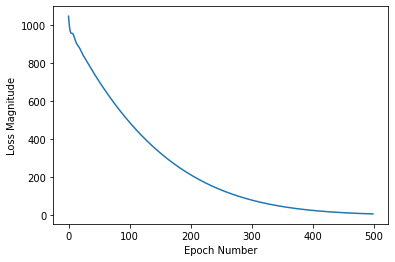

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Now we can use the model to predict values

In [7]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 62ms/step
[[211.3377]]


Looking at Layer Weights

In [9]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.8200977]], dtype=float32), array([29.327936], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.